In [24]:
import requests
from functions import get_fred
import pandas as pd
import matplotlib.pyplot as plt
import datetime as datetime

In [13]:
def fetch_new_data():    
    server = "http://127.0.0.1:5000/"    
    response = requests.get(server + "/")    
    raw_json = response.json()
    return raw_json

# uncomment for fresh new data
raw_json = fetch_new_data()

In [14]:
df = get_fred(raw_json)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   date                  4238 non-null   datetime64[ns]
 1   fed_funds             4027 non-null   float64       
 2   2y                    4009 non-null   float64       
 3   10y                   4009 non-null   float64       
 4   10y_2y_spread         4010 non-null   float64       
 5   fed_assets            836 non-null    float64       
 6   bank_reserves         836 non-null    float64       
 7   core_pce              189 non-null    float64       
 8   payrolls              192 non-null    float64       
 9   unemployment          191 non-null    float64       
 10  real_gdp              63 non-null     float64       
 11  financial_conditions  837 non-null    float64       
dtypes: datetime64[ns](1), float64(11)
memory usage: 397.4 KB


In [32]:
df.head()

,date,fed_funds,2y,10y,10y_2y_spread,fed_assets,bank_reserves,core_pce,payrolls,unemployment,real_gdp,financial_conditions
0,2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,89.368,129802.0,9.8,16582.71,-0.18042
1,2010-01-04,0.12,1.09,3.85,2.76,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2010-01-05,0.12,1.01,3.77,2.76,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2010-01-06,0.12,1.01,3.85,2.84,2235304.0,994051.0,NaN,NaN,NaN,NaN,NaN
4,2010-01-07,0.10,1.03,3.85,2.82,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
last_index = df.apply(lambda x: x.last_valid_index())

summary_data = []

for column in df.columns:
    if column == 'date':
        continue
    
    idx = last_index[column]
    
    last_date = df.loc[idx, 'date']
    value = df.loc[idx, column].round(2)
    
    summary_data.append({
        "Variable": column,
        "Last Available Date": last_date,
        "Value": value
    })


latest_stats_df = pd.DataFrame(summary_data)

latest_stats_df

,Variable,Last Available Date,Value
0,fed_funds,2026-01-14,3.64
1,2y,2026-01-13,3.53
2,10y,2026-01-13,4.18
3,10y_2y_spread,2026-01-14,0.64
4,fed_assets,2026-01-07,6573602.00
5,bank_reserves,2026-01-07,2996379.00
6,core_pce,2025-09-01,126.96
7,payrolls,2025-12-01,159526.00
8,unemployment,2025-12-01,4.40
9,real_gdp,2025-07-01,24024.96


In [52]:
latest_date = df["date"].max()

df_1y = df[df['date'] >= (latest_date - pd.Timedelta(days=365))]
df_5y = df[df['date'] >= (latest_date - pd.Timedelta(days=365*5))]
df_10y = df[df['date'] >= (latest_date - pd.Timedelta(days=365*10))]
df_20y = df[df['date'] >= (latest_date - pd.Timedelta(days=365*10))]


In [75]:
# df_1y.plot(x="date", y="fed_funds")
# df_1y.plot(x="date", y="2y")
# df_1y.plot(x="date", y="10y")
# df_1y.plot(x="date", y="10y_2y_spread")
# df_1y.plot(x="date", y="fed_assets")
# df_1y.plot(x="date", y="bank_reserves")


In [78]:
df["bank_reserves"].dropna()

3        994051.0
8       1059208.0
13      1078881.0
18      1104555.0
23      1126672.0
          ...    
4212    2932112.0
4217    2959044.0
4222    2955581.0
4227    2957410.0
4232    2996379.0
Name: bank_reserves, Length: 836, dtype: float64

<Axes: xlabel='date'>

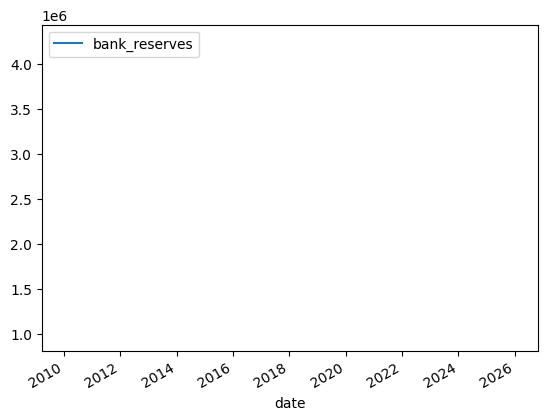

In [76]:
df.plot(x="date", y="bank_reserves")

<Axes: xlabel='date'>

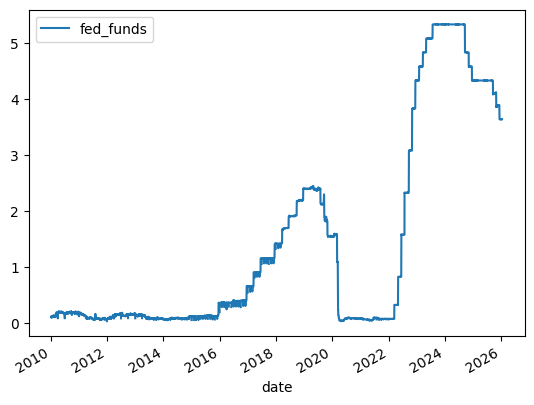

In [64]:
df.plot(x="date", y="fed_funds")